# Cleaning the Dataset


In [2]:
import pandas as pd
import numpy as np

In [3]:
car_data = pd.read_csv('../data/raw/used_cars_exploration.csv')

In [4]:
car_data.sample(5)


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
3282,Dodge,Charger SE,2017,"63,250 mi.",Gasoline,292.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,A/T,Red,Black,None reported,Yes,18650.0
2501,Jeep,Wrangler Unlimited Sport,2019,"52,775 mi.",Gasoline,285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Gray,Black,None reported,Yes,39799.0
1992,Jaguar,F-TYPE S,2015,"25,786 mi.",Gasoline,380.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Blue,Gray,None reported,Yes,38500.0
406,Dodge,Durango GT,2021,"14,684 mi.",Gasoline,3.6L V6 24V MPFI DOHC,8-Speed Automatic,DB Black Clearcoat,Black,None reported,NaN,37995.0
911,Audi,A8 L 3.0T,2016,"55,000 mi.",Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,White,Brown,None reported,Yes,28000.0


In [5]:
# Remove ',' and ' mi.' from milage and convert to int
car_data['milage'] = car_data['milage'].str.replace(',', '').str.replace(' mi.', '').astype(float)

# Convert model_year to int
car_data['model_year'] = car_data['model_year'].astype(int)

# Fill missing values in 'clean_title' with the mode
car_data['clean_title'] = car_data['clean_title'].fillna(car_data['clean_title'].mode()[0])


In [6]:
car_data.sample(5)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
2438,Subaru,Outback Limited,2021,15636.0,Gasoline,2.5L H4 16V GDI DOHC,Automatic CVT,Crystal Black Silica,Black,None reported,Yes,33531.0
1667,Buick,Enclave Leather,2015,68653.0,Gasoline,288.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,At least 1 accident or damage reported,Yes,18950.0
3768,GMC,HUMMER EV Edition 1,2023,940.0,NaN,Electric Motor Electric Fuel System,A/T,White,Black,NaN,Yes,146000.0
3137,Jeep,Cherokee Sport,1996,170552.0,Gasoline,190.0HP 4.0L Straight 6 Cylinder Engine Gasoli...,4-Speed A/T,Black,Gray,At least 1 accident or damage reported,Yes,6500.0
1235,Nissan,Leaf SL,2012,26930.0,NaN,107.0HP Electric Motor Electric Fuel System,1-Speed A/T,White,Beige,None reported,Yes,6700.0


In [7]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         4009 non-null   object 
 1   model         4009 non-null   object 
 2   model_year    4009 non-null   int64  
 3   milage        4009 non-null   float64
 4   fuel_type     3839 non-null   object 
 5   engine        4009 non-null   object 
 6   transmission  4009 non-null   object 
 7   ext_col       4009 non-null   object 
 8   int_col       4009 non-null   object 
 9   accident      3896 non-null   object 
 10  clean_title   4009 non-null   object 
 11  price         4009 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 376.0+ KB


In [8]:
# Drop duplicates
car_data = car_data.drop_duplicates()

In [9]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         4009 non-null   object 
 1   model         4009 non-null   object 
 2   model_year    4009 non-null   int64  
 3   milage        4009 non-null   float64
 4   fuel_type     3839 non-null   object 
 5   engine        4009 non-null   object 
 6   transmission  4009 non-null   object 
 7   ext_col       4009 non-null   object 
 8   int_col       4009 non-null   object 
 9   accident      3896 non-null   object 
 10  clean_title   4009 non-null   object 
 11  price         4009 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 376.0+ KB


In [10]:
car_data.isna().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title       0
price             0
dtype: int64

In [11]:
car_data.dropna(inplace=True)

In [12]:
car_data.sample(5)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
2347,Chevrolet,Silverado 1500 LTZ,2021,62257.0,Gasoline,5.3L V8 16V GDI OHV,8-Speed Automatic,Satin Steel Metallic,Gideon,None reported,Yes,42590.0
2776,Ford,F-150 XLT,2020,57000.0,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Gray,Gray,At least 1 accident or damage reported,Yes,37500.0
1413,GMC,Sierra 1500 SLT,2021,23400.0,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,52000.0
1718,Pontiac,Solstice GXP,2007,25718.0,Gasoline,260.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,M/T,Yellow,Black,None reported,Yes,17900.0
96,Jeep,Grand Cherokee Summit,2020,31349.0,Gasoline,5.7L V8 16V MPFI OHV,8-Speed Automatic,Granite Crystal Clearcoat Metallic,Black,None reported,Yes,39366.0


In [13]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3730 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         3730 non-null   object 
 1   model         3730 non-null   object 
 2   model_year    3730 non-null   int64  
 3   milage        3730 non-null   float64
 4   fuel_type     3730 non-null   object 
 5   engine        3730 non-null   object 
 6   transmission  3730 non-null   object 
 7   ext_col       3730 non-null   object 
 8   int_col       3730 non-null   object 
 9   accident      3730 non-null   object 
 10  clean_title   3730 non-null   object 
 11  price         3730 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 378.8+ KB


In [14]:
car_data.isna().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [15]:
# Standardize the categorical columns to lowercase
for col in car_data.select_dtypes(include=['object']).columns:
    car_data[col] = car_data[col].str.lower()

In [16]:
car_data.sample(5)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
768,hyundai,tucson se,2018,66126.0,gasoline,2.0l i4 16v gdi dohc,6-speed automatic,dazzling white,gray,none reported,yes,19190.0
2446,jeep,wrangler sport,2016,74139.0,gasoline,285.0hp 3.6l v6 cylinder engine gasoline fuel,6-speed m/t,red,black,none reported,yes,23000.0
3313,mercedes-benz,glc 300 base,2020,42717.0,gasoline,255.0hp 2.0l 4 cylinder engine gasoline fuel,a/t,gold,beige,none reported,yes,33500.0
540,dodge,charger r/t,2012,122000.0,gasoline,370.0hp 5.7l 8 cylinder engine gasoline fuel,5-speed a/t,white,black,at least 1 accident or damage reported,yes,13500.0
2878,mercedes-benz,cls-class cls 400 4matic,2016,62285.0,gasoline,329.0hp 3.0l v6 cylinder engine gasoline fuel,7-speed a/t,black,black,at least 1 accident or damage reported,yes,29950.0


In [17]:
# Save cleaned dataset
car_data.to_csv('../data/raw/used_cars_cleaned.csv', index=False)

In [18]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers in 'price'
car_data = remove_outliers_iqr(car_data, 'price')

# Remove outliers in 'milage'
car_data = remove_outliers_iqr(car_data, 'milage')

In [22]:
car_data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,ford,utility police interceptor base,2013,51000.0,e85 flex fuel,300.0hp 3.7l v6 cylinder engine flex fuel capa...,6-speed a/t,black,black,at least 1 accident or damage reported,yes,10300.0
1,hyundai,palisade sel,2021,34742.0,gasoline,3.8l v6 24v gdi dohc,8-speed automatic,moonlight cloud,gray,at least 1 accident or damage reported,yes,38005.0
2,lexus,rx 350 rx 350,2022,22372.0,gasoline,3.5 liter dohc,automatic,blue,black,none reported,yes,54598.0
3,infiniti,q50 hybrid sport,2015,88900.0,hybrid,354.0hp 3.5l v6 cylinder engine gas/electric h...,7-speed a/t,black,black,none reported,yes,15500.0
4,audi,q3 45 s line premium plus,2021,9835.0,gasoline,2.0l i4 16v gdi dohc turbo,8-speed automatic,glacier white metallic,black,none reported,yes,34999.0


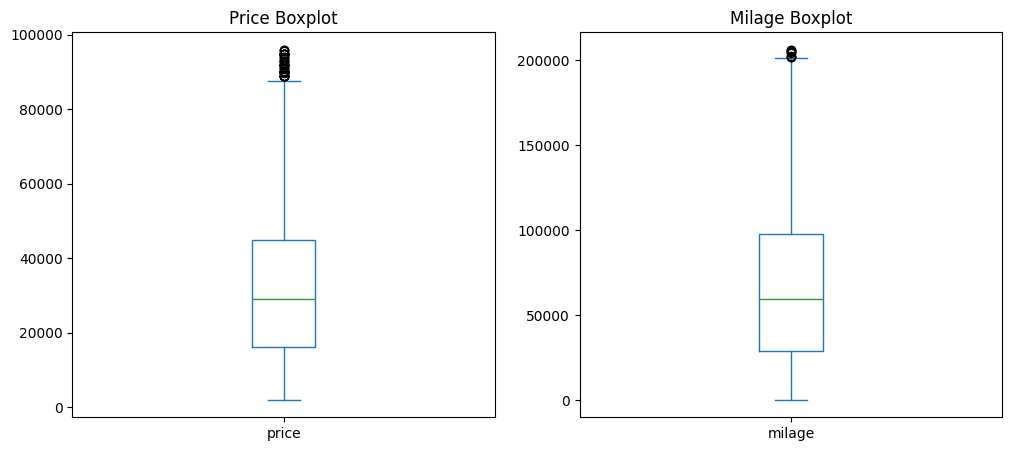

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
car_data['price'].plot.box()
plt.title('Price Boxplot')

plt.subplot(1,2,2)
car_data['milage'].plot.box()
plt.title('Milage Boxplot')

plt.show()